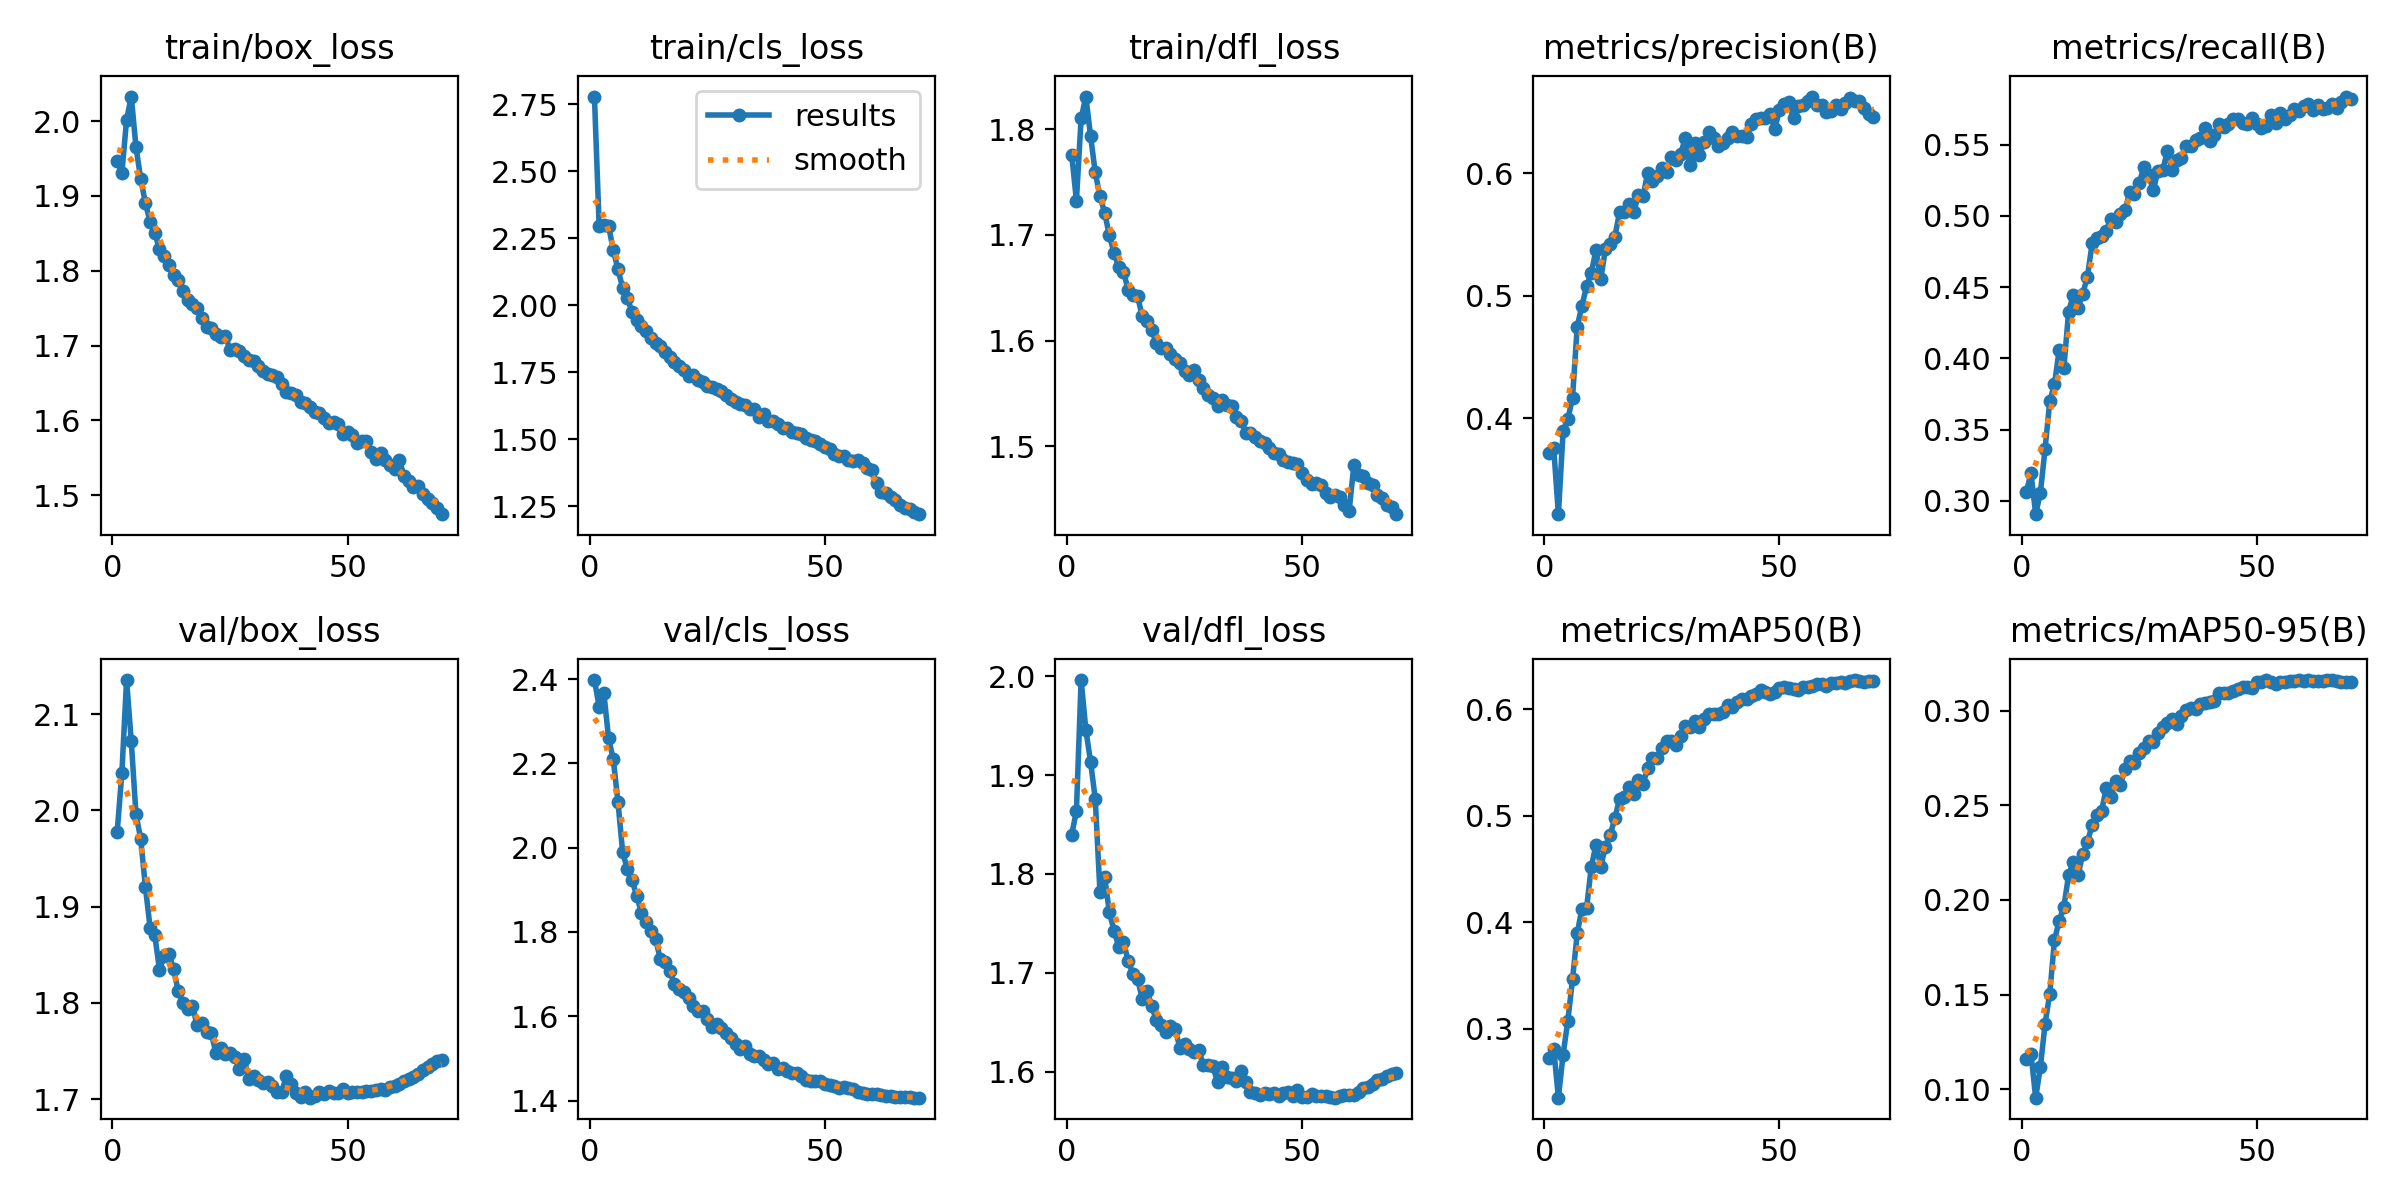

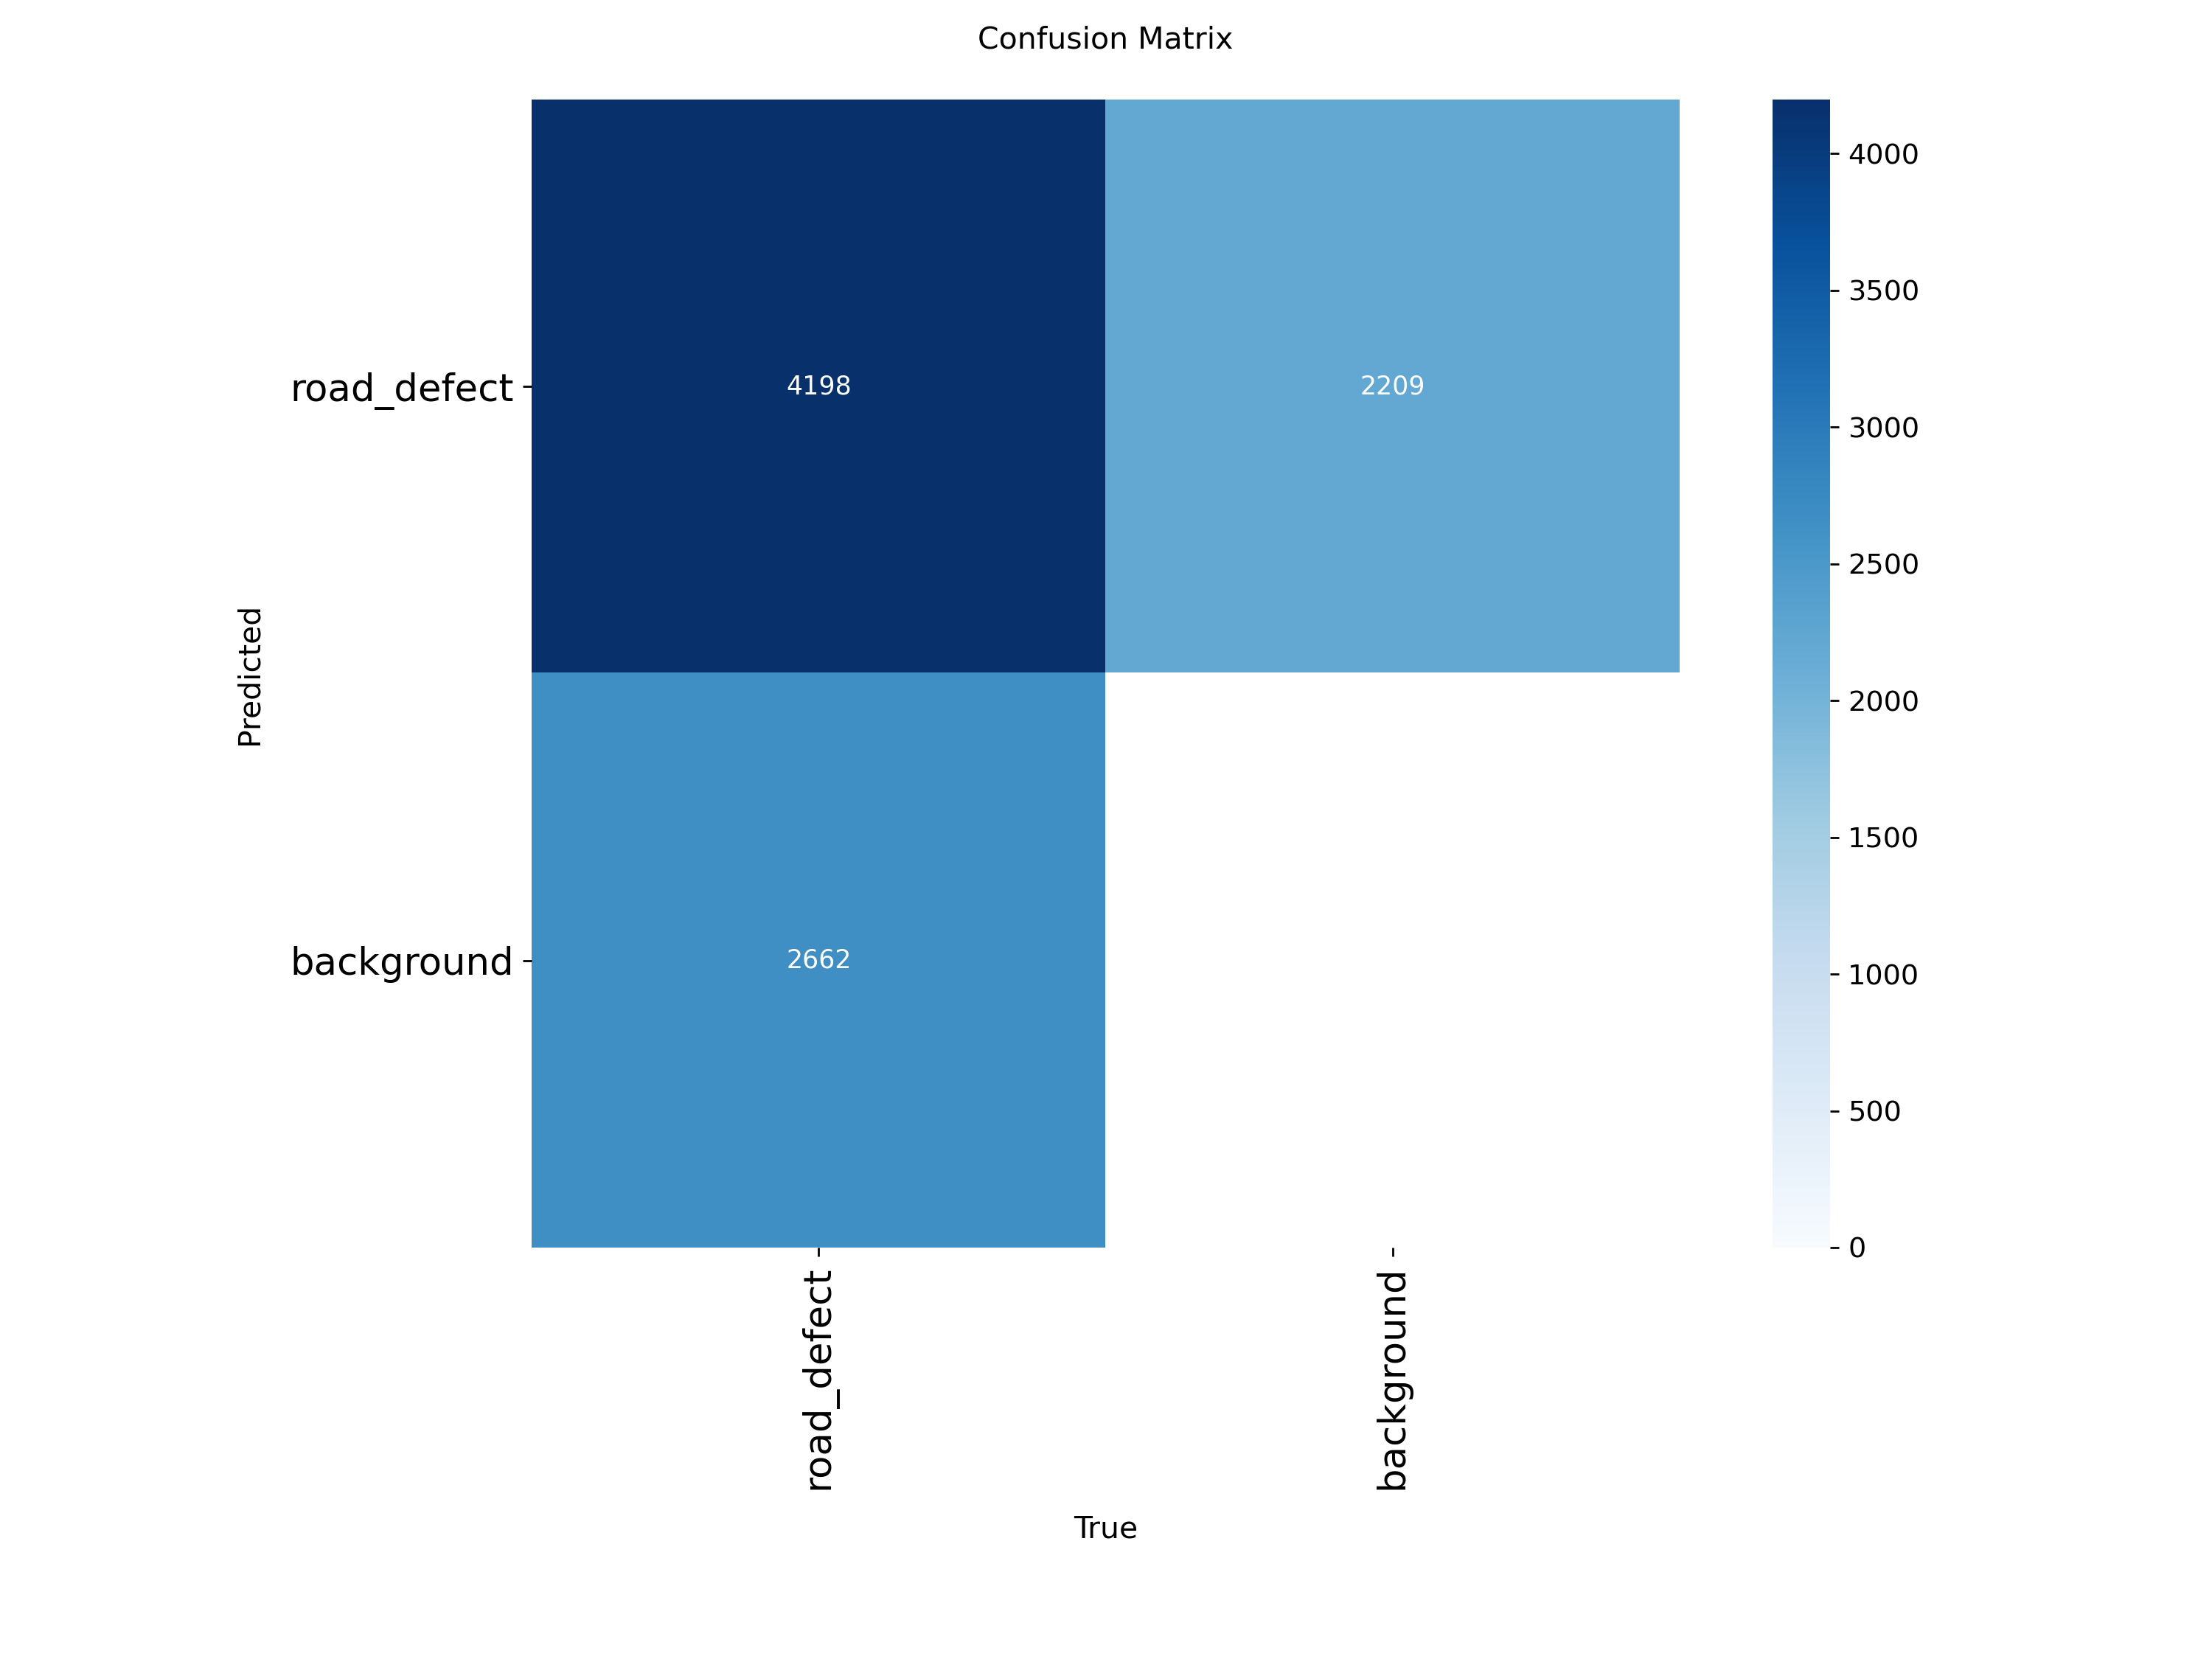

In [1]:
from IPython.display import Image, display
from pathlib import Path

RUN_DIR = Path("../../runs/three_country_training/road_defect_binary/yolov8n8")

display(Image(filename=str(RUN_DIR / "results.png")))
display(Image(filename=str(RUN_DIR / "confusion_matrix.png")))


In [3]:
import pandas as pd

results_csv = RUN_DIR / "results.csv"
assert results_csv.exists(), "results.csv not found!"

df = pd.read_csv(results_csv)
df.tail()

epoch     time  train/box_loss  train/cls_loss  train/dfl_loss  \
65     66  5465.81         1.50227         1.25322         1.45395   
66     67  5547.69         1.49450         1.24388         1.45053   
67     68  5629.30         1.48954         1.23962         1.44464   
68     69  5711.12         1.48346         1.22828         1.44224   
69     70  5792.84         1.47469         1.22075         1.43554   

    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
65               0.65931            0.57813           0.62764   
66               0.65922            0.57595           0.62672   
67               0.65290            0.57994           0.62563   
68               0.64818            0.58367           0.62636   
69               0.64564            0.58207           0.62646   

    metrics/mAP50-95(B)  val/box_loss  val/cls_loss  val/dfl_loss    lr/pg0  \
65              0.31609       1.73017       1.40831       1.59114  0.002421   
66              0.31552       1.73298       1.40825       1.59303  0.001997   
67              0.31513       1.73595       1.40770       1.59521  0.001573   
68              0.31499       1.73901       1.40696       1.59753  0.001149   
69              0.31510       1.74035       1.40673       1.59881  0.000724   

      lr/pg1    lr/pg2    lr/pg3    lr/pg4    lr/pg5    lr/pg6    lr/pg7  
65  0.000807  0.002421  0.000807  0.002421  0.000807  0.002421  0.000807  
66  0.000666  0.001997  0.000666  0.001997  0.000666  0.001997  0.000666  
67  0.000524  0.001573  0.000524  0.001573  0.000524  0.001573  0.000524  
68  0.000383  0.001149  0.000383  0.001149  0.000383  0.001149  0.000383  
69  0.000241  0.000724  0.000241  0.000724  0.000241  0.000724  0.000241

In [4]:
final = df.iloc[-1]

print("Final metrics:")
print(f"Precision: {final['metrics/precision(B)']:.4f}")
print(f"Recall:    {final['metrics/recall(B)']:.4f}")
print(f"mAP@0.5:   {final['metrics/mAP50(B)']:.4f}")
print(f"mAP@0.5:0.95: {final['metrics/mAP50-95(B)']:.4f}")

Final metrics:
Precision: 0.6456
Recall:    0.5821
mAP@0.5:   0.6265
mAP@0.5:0.95: 0.3151


In [5]:
# Predict
from ultralytics import YOLO
model = YOLO("../../runs/three_country_training/road_defect_binary/yolov8n8/weights/best.pt")

model.predict(
    source="../../data/test1/India/images",
    conf=0.2,
    save=True,
    project="../../runs/three_country_inference/road_defect_binary/yolov8n8",
    name="predictions_test"
)



image 1/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000006.jpg: 640x640 2 road_defects, 2.4ms
image 2/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000009.jpg: 640x640 2 road_defects, 2.4ms
image 3/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000015.jpg: 640x640 (no detections), 2.4ms
image 4/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000021.jpg: 640x640 (no detections), 2.4ms
image 5/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000025.jpg: 640x640 (no detections), 3.1ms
image 6/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/test1/India/images/India_000029.jpg: 640x640 1 road_defect, 2.4ms
image 7/969 /home/saber/GitHub/road_anomaly_detection/src/three_countries/../../data/

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'road_defect'}
 obb: None
 orig_img: array([[[222, 184, 150],
         [221, 183, 149],
         [221, 183, 149],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        [[221, 183, 149],
         [221, 183, 149],
         [220, 182, 148],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        [[220, 182, 148],
         [220, 182, 148],
         [219, 181, 147],
         ...,
         [205, 163, 128],
         [205, 163, 128],
         [205, 163, 128]],
 
        ...,
 
        [[ 83,  87,  88],
         [ 81,  85,  86],
         [ 79,  83,  84],
         ...,
         [ 61,  60,  46],
         [ 61,  60,  46],
         [ 60,  59,  45]],
 
        [[ 80,  84,  85],
         [ 81,  85,  86],
         [ 81,  85,  86],
         ...,
         [ 60

Total test images predicted: 969


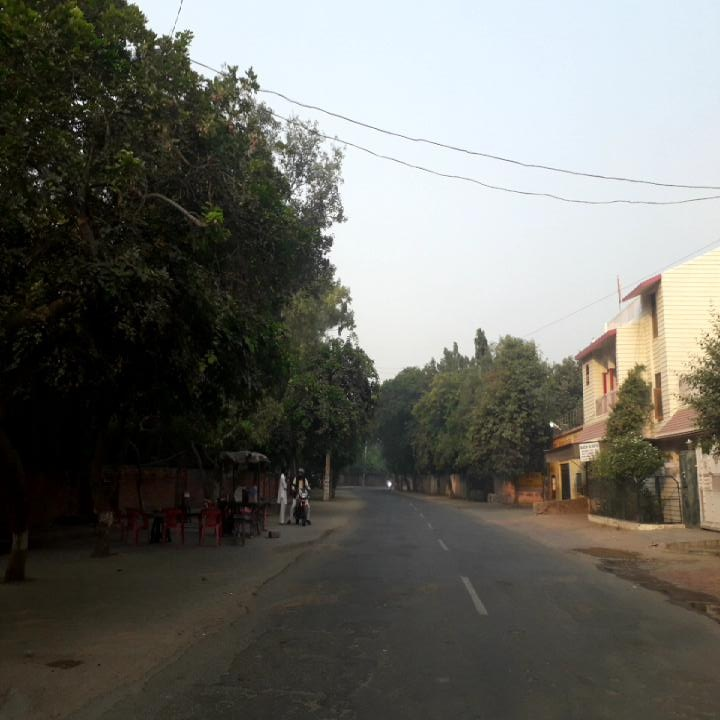

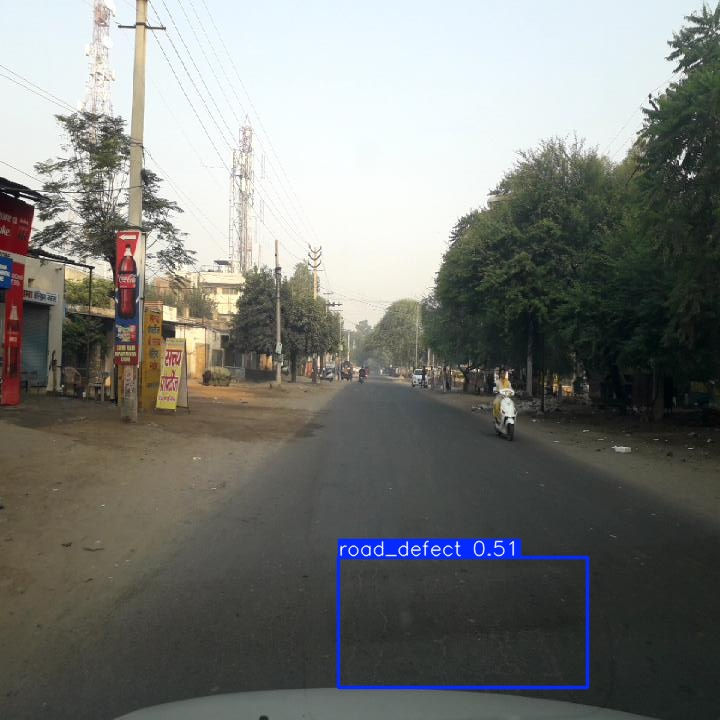

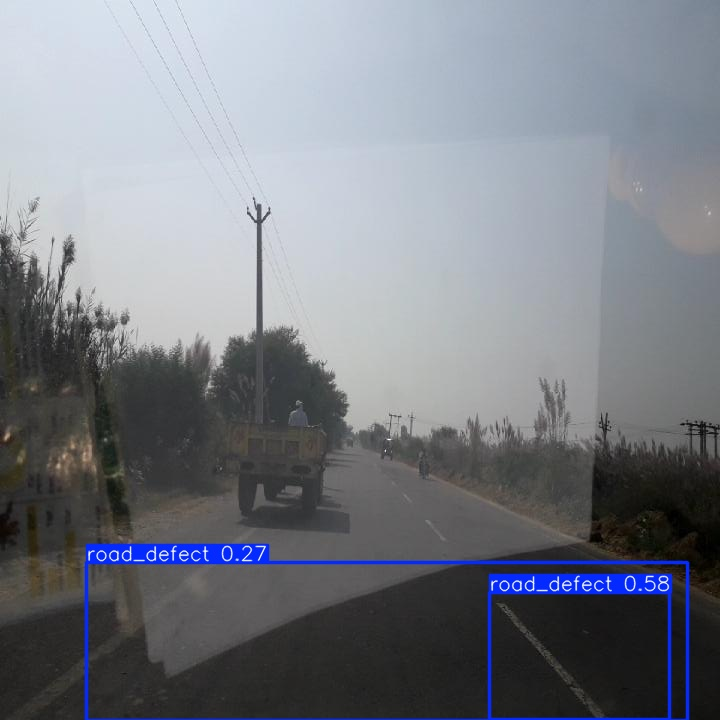

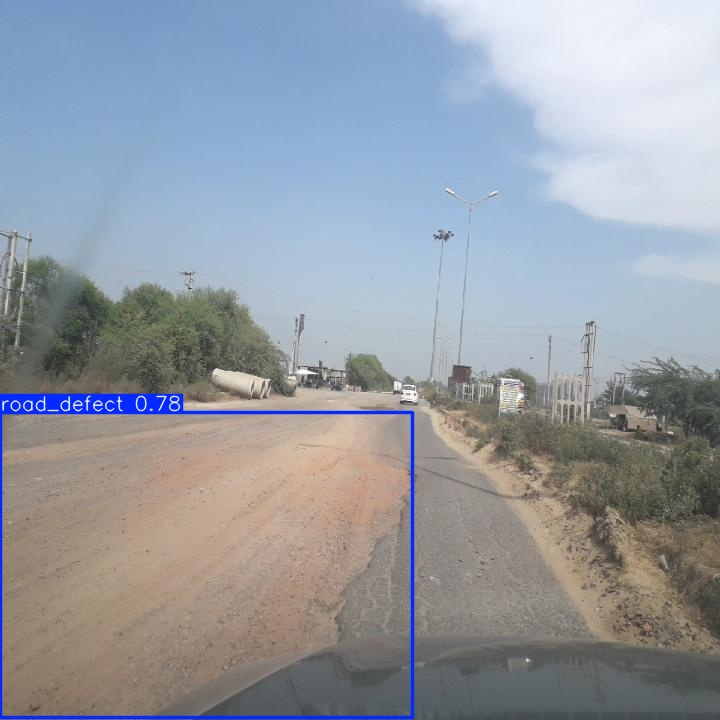

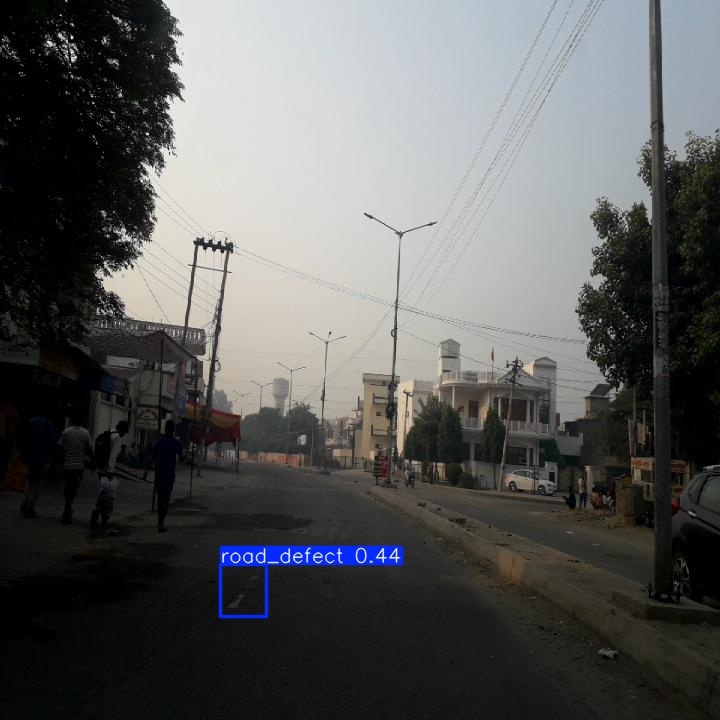

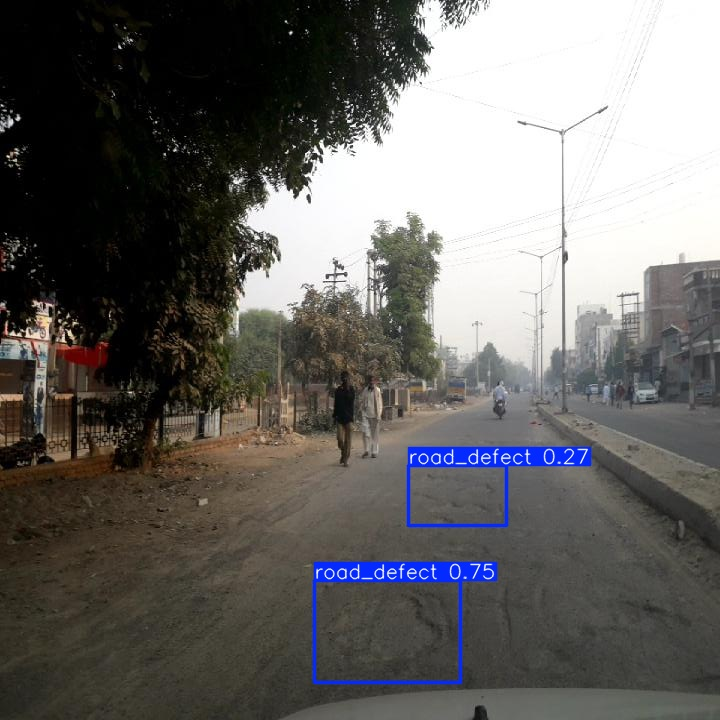

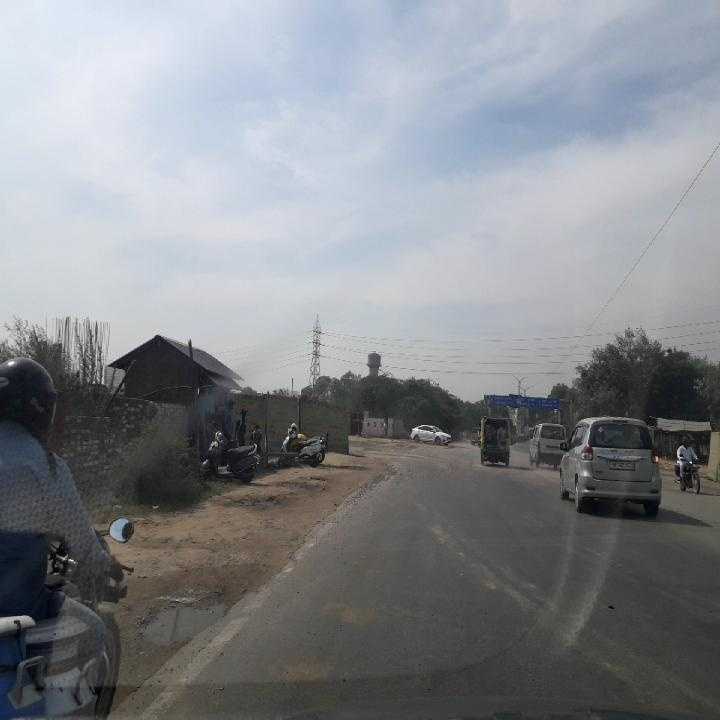

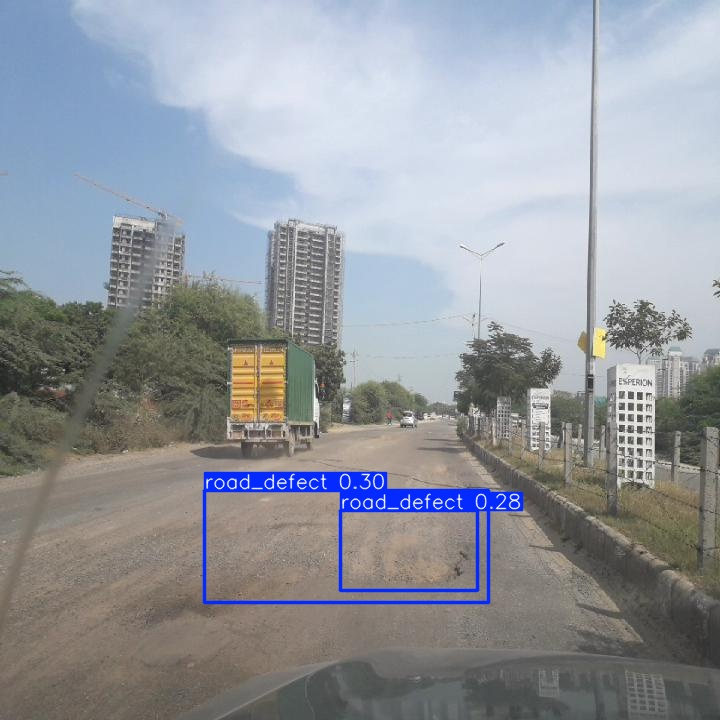

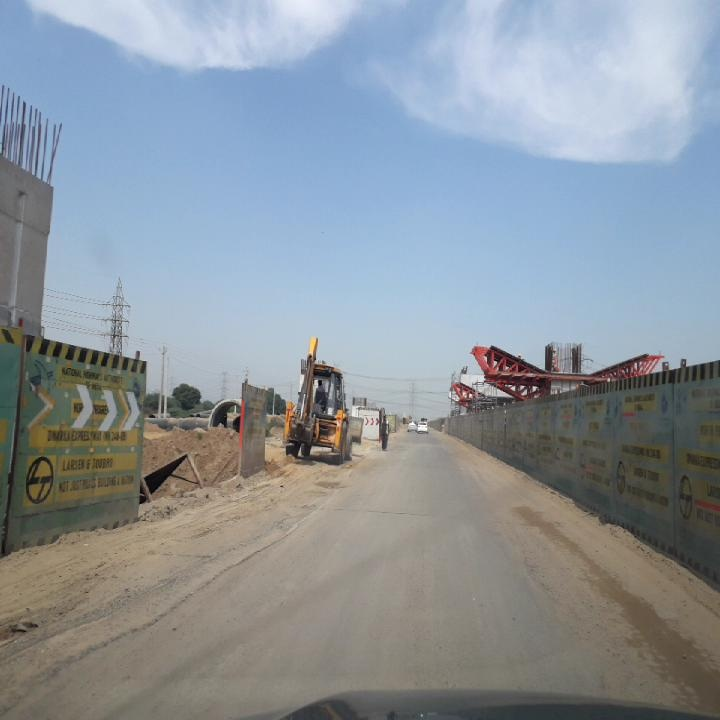

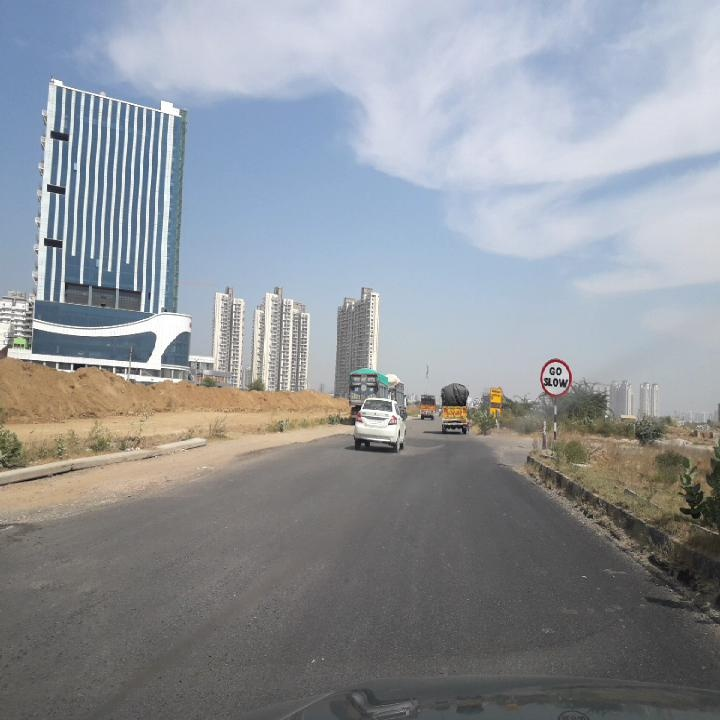

In [6]:
from pathlib import Path
from IPython.display import Image, display
import random

PRED_TEST_DIR = Path("../../runs/three_country_inference/road_defect_binary/yolov8n8/predictions_test")

images = list(PRED_TEST_DIR.glob("*.jpg"))
print(f"Total test images predicted: {len(images)}")

for img in random.sample(images, 10):
    display(Image(filename=str(img)))